# Linear Regression
## Question 1
Make a class called LinearRegression which provides two functions : fit and predict. Try to implement it from scratch. If stuck, refer to the codes provided.

In [49]:
import numpy as np
class LinearRegression:
    def __init__(self, learning_rate, epochs):
      self.lr=learning_rate;
      self.epo=epochs;
    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)
        self.weight=np.zeros((n_features,1))
        self.bias=np.zeros((1,1))
        for _ in range(self.epo):
            delta=y-np.dot(X,self.weight)-self.bias
            dw=np.dot(X.T,delta)/n_samples
            db=np.sum(delta)/n_samples
            self.weight+=self.lr*dw
            self.bias+=self.lr*db
    def predict(self, X):
      print(self.weight)
      print()
      print(self.bias)
      return np.dot(X,self.weight)+self.bias

## Question 2

Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the model created in question 1 and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>.
10. Tune the hyperparameters of your models (learning rate, epochs) to achieve losses close to that of the sklearn models.

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.

In [50]:
from google.colab import files
files.upload()  # Select the file from your Downloads

Saving Real estate.csv to Real estate.csv


{'Real estate.csv': b'No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area\n1,2012.917,32,84.87882,10,24.98298,121.54024,37.9\n2,2012.917,19.5,306.5947,9,24.98034,121.53951,42.2\n3,2013.583,13.3,561.9845,5,24.98746,121.54391,47.3\n4,2013.500,13.3,561.9845,5,24.98746,121.54391,54.8\n5,2012.833,5,390.5684,5,24.97937,121.54245,43.1\n6,2012.667,7.1,2175.03,3,24.96305,121.51254,32.1\n7,2012.667,34.5,623.4731,7,24.97933,121.53642,40.3\n8,2013.417,20.3,287.6025,6,24.98042,121.54228,46.7\n9,2013.500,31.7,5512.038,1,24.95095,121.48458,18.8\n10,2013.417,17.9,1783.18,3,24.96731,121.51486,22.1\n11,2013.083,34.8,405.2134,1,24.97349,121.53372,41.4\n12,2013.333,6.3,90.45606,9,24.97433,121.5431,58.1\n13,2012.917,13,492.2313,5,24.96515,121.53737,39.3\n14,2012.667,20.4,2469.645,4,24.96108,121.51046,23.8\n15,2013.500,13.2,1164.838,4,24.99156,121.53406,34.3\n16,2013.583,35.7,579.2083,2,24.9824,121.546

In [51]:
import pandas as pd
df = pd.read_csv("Real estate.csv")
print(df.isnull().sum())


No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


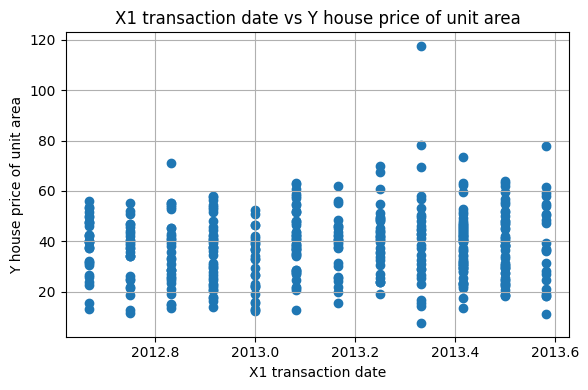

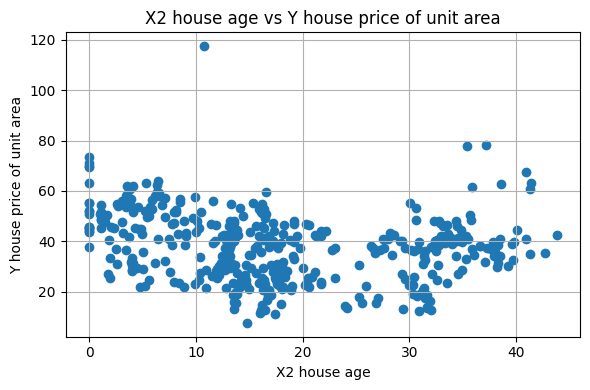

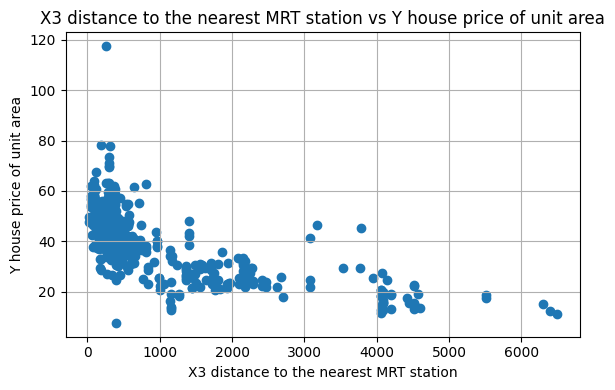

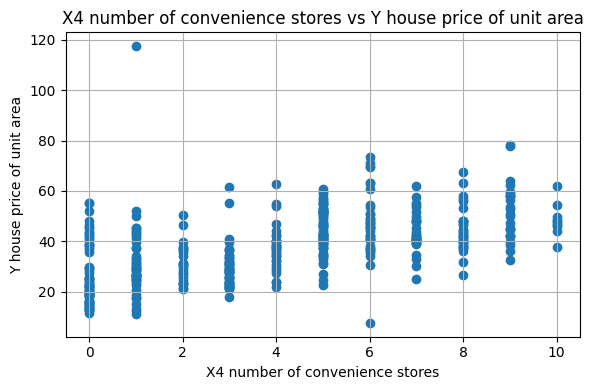

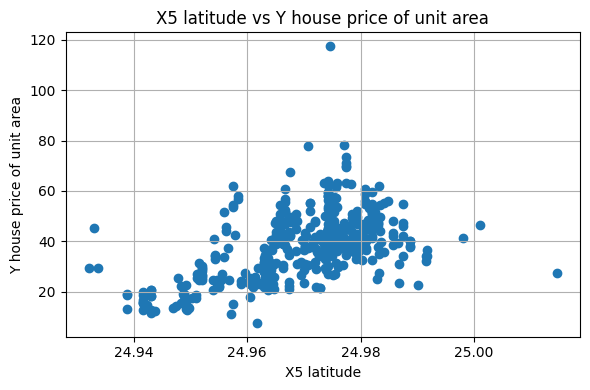

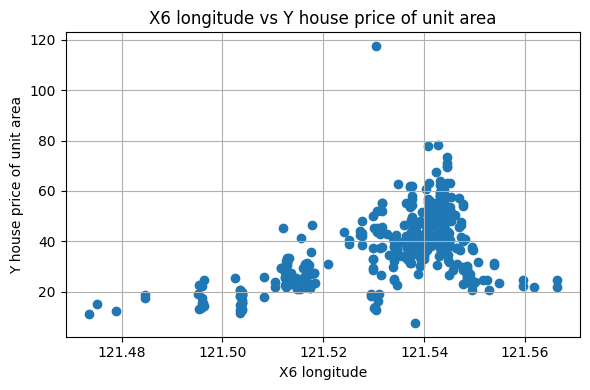

In [52]:
import matplotlib.pyplot as plt

for col in df.columns[1:-1]:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[col], df['Y house price of unit area'])
    plt.title(f'{col} vs Y house price of unit area')
    plt.xlabel(col)
    plt.ylabel('Y house price of unit area')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [53]:
df = df.drop(columns=['No'])

In [54]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.25, random_state=52)
#print(f"Train size: {len(train_data)}")
#print(f"Test size: {len(test_data)}")

In [55]:
from sklearn.preprocessing import MinMaxScaler
X_train = train_data.drop(columns=['Y house price of unit area'])
y_train = train_data['Y house price of unit area']

X_test = test_data.drop(columns=['Y house price of unit area'])
y_test = test_data['Y house price of unit area']

scaler = MinMaxScaler() #we use this cause the scaling should be uniform in bost test and train data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [56]:
model = LinearRegression(learning_rate=0.87, epochs=4023)
model.fit(X_train_scaled, y_train.values)
y_pred = model.predict(X_test_scaled)

[[  3.12942043]
 [-10.17019269]
 [-24.36037096]
 [ 12.40893067]
 [ 19.62454508]
 [  1.59548068]]

[[29.30934176]]


In [57]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"R^2: {r2:.4f}")


MSE: 127.1696
R^2: 0.4614


In [58]:
from sklearn.linear_model import LinearRegression as SKLinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sk_model = SKLinearRegression()
sk_model.fit(X_train_scaled, y_train)

y_pred_sk = sk_model.predict(X_test_scaled)

mse_sk = mean_squared_error(y_test, y_pred_sk)
r2_sk = r2_score(y_test, y_pred_sk)

print(f"Sklearn LinearRegression - MSE: {mse_sk:.4f}")
print(f"Sklearn LinearRegression - R^2: {r2_sk:.4f}")
# lr=0.87 and epo=4023

Sklearn LinearRegression - MSE: 127.1696
Sklearn LinearRegression - R^2: 0.4614


# Logistic Regression
## Question 3

The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Normalize the X data using MinMaxScaler or StandardScaler.
4. Create a train-test-split. Take any suitable test size.

In [59]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
data = load_breast_cancer()
X = data.data
y = data.target
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=52)

5. Write code for the sigmoid function and Logistic regression.


In [3]:
def sigmoid(z):
   return 1/(1+np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z)*(1-sigmoid(z))

class LogisticRegression:
    def __init__(self, learning_rate, epochs):
      #Initialise the hyperparameters of the model
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)
        self.weights = np.zeros((n_features, 1))
        self.bias = np.zeros((1, 1))

        #Implement the GD algortihm
        for _ in range(self.epochs):
            z = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(z)
            y_pred = y_pred.reshape(-1, 1)

            dw = np.dot(X.T, (y_pred - y)) / n_samples
            db = np.sum(y_pred - y) / n_samples

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = 1 / (1 + np.exp(-linear_model))
        return (y_pred >= 0.5).astype(int).flatten()


6. Fit your model on the dataset and make predictions.
7. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
8. Print accuracy_score in each case using sklearn.metrics .

In [4]:
from sklearn.metrics import accuracy_score
model = LogisticRegression(learning_rate=0.1, epochs=5000)
model.fit(X_train, y_train)
y_pred_custom = model.predict(X_test)
acc_custom = accuracy_score(y_test, y_pred_custom)
print("Accuracy:", acc_custom)

Accuracy: 0.986013986013986


In [9]:
from sklearn.linear_model import LogisticRegression as SklearnLogistic
sk_model = SklearnLogistic(penalty='l2', solver='liblinear', max_iter=1000)
sk_model.fit(X_train, y_train)
y_pred_sk = sk_model.predict(X_test)
acc_sk = accuracy_score(y_test, y_pred_sk)
print("Accuracy:", acc_sk)

Accuracy: 0.986013986013986


9. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
10. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test, y_pred_custom))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_custom))

print("Scikit-learn Logistic Regression")

print("Classification Report:")
print(classification_report(y_test, y_pred_sk))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_sk))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.99      0.99      0.99        93

    accuracy                           0.99       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.99      0.99      0.99       143

Confusion Matrix:
[[49  1]
 [ 1 92]]
Scikit-learn Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        50
           1       0.98      1.00      0.99        93

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.98       143
weighted avg       0.99      0.99      0.99       143

Confusion Matrix:
[[48  2]
 [ 0 93]]


# KNN
## Question 4

How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass".

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.

In [11]:
from google.colab import files
files.upload()  # Select the file from your Downloads

Saving glass.csv to glass.csv


{'glass.csv': b'RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type\n1.52101,13.64,4.49,1.1,71.78,0.06,8.75,0,0,1\n1.51761,13.89,3.6,1.36,72.73,0.48,7.83,0,0,1\n1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0,1\n1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0,1\n1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0,0,1\n1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0,0.26,1\n1.51743,13.3,3.6,1.14,73.09,0.58,8.17,0,0,1\n1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0,0,1\n1.51918,14.04,3.58,1.37,72.08,0.56,8.3,0,0,1\n1.51755,13,3.6,1.36,72.99,0.57,8.4,0,0.11,1\n1.51571,12.72,3.46,1.56,73.2,0.67,8.09,0,0.24,1\n1.51763,12.8,3.66,1.27,73.01,0.6,8.56,0,0,1\n1.51589,12.88,3.43,1.4,73.28,0.69,8.05,0,0.24,1\n1.51748,12.86,3.56,1.27,73.21,0.54,8.38,0,0.17,1\n1.51763,12.61,3.59,1.31,73.29,0.58,8.5,0,0,1\n1.51761,12.81,3.54,1.23,73.24,0.58,8.39,0,0,1\n1.51784,12.68,3.67,1.16,73.11,0.61,8.7,0,0,1\n1.52196,14.36,3.85,0.89,71.36,0.15,9.15,0,0,1\n1.51911,13.9,3.73,1.18,72.12,0.06,8.89,0,0,1\n1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0,0.07,1\n1.5175,12.8

In [15]:
import pandas as pd
df = pd.read_csv("glass.csv")
print(df.isnull().sum())
df.head()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [18]:
X = df.drop(['Type'], axis=1)  # 9 features are present
y = df['Type']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#print("X_train shape:", X_train.shape)
#print("X_test shape:", X_test.shape)
#print("y_train shape:", y_train.shape)
#print("y_test shape:", y_test.shape)

4. Define Euclidean distance.
5. Build the KNN model.
6. Fit the model on the training data. (Note : you may require to change the type of the data from pandas dataframe to numpy arrays. To do that, just do this X=np.array(X) and so on...)

In [28]:
import numpy as np
from collections import Counter

def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KNN(object):
    def __init__(self,k):
        self.k=k
    def fit(self,x_train,y_train):
        # Convert pandas DataFrames/Series to numpy arrays
        self.x_train = np.array(x_train)
        self.y_train = np.array(y_train)
    def predict(self,x_test):
        # Convert pandas DataFrame to numpy array
        x_test_np = np.array(x_test)
        predictions=[self._helper(x) for x in x_test_np]
        return np.array(predictions)
    def _helper(self,x):
        # Ensure x_train is treated as a collection of rows
        prediction=[euclidean_distance(x,x1) for x1 in self.x_train]
        indices= np.argsort(prediction)[:self.k]
        # y_train is now a numpy array, so direct indexing works
        labels= [self.y_train[i] for i in indices]
        c=Counter(labels).most_common()
        return c[0][0]

def accuracy(predictions,y_test):
    # y_test should also be converted to a numpy array for this comparison
    return np.sum(predictions==np.array(y_test))/len(y_test)

In [37]:
clf=KNN(k=3)
clf.fit(X_train,y_train)
predictions=clf.predict(X_test)

7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)

In [39]:
from sklearn.metrics import accuracy_score

# Try different values of k
for k in range(1, 11):
    clf = KNN(k=k)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    print(f"k = {k} → Accuracy = {acc:.4f}")


k = 1 → Accuracy = 0.7778
k = 2 → Accuracy = 0.7778
k = 3 → Accuracy = 0.6852
k = 4 → Accuracy = 0.7037
k = 5 → Accuracy = 0.6667
k = 6 → Accuracy = 0.6296
k = 7 → Accuracy = 0.6296
k = 8 → Accuracy = 0.6667
k = 9 → Accuracy = 0.5926
k = 10 → Accuracy = 0.6296


In [42]:
#k=1 is better
clf=KNN(k=1)
clf.fit(X_train,y_train)
predictions=clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.7777777777777778


In [48]:
from sklearn.neighbors import KNeighborsClassifier
# Use the same k as in your custom model (e.g., k=3)
for k in range(1,4):
    sk_model = KNeighborsClassifier(n_neighbors=k)
    sk_model.fit(X_train, y_train)
    sk_predictions = sk_model.predict(X_test)
    sk_acc = accuracy_score(y_test, sk_predictions)
    print(f"Sklearn KNN (k={k}) Accuracy: {sk_acc:.4f}")
    custom_model = KNN(k=k)
    custom_model.fit(X_train, y_train)
    custom_predictions = custom_model.predict(X_test)
    custom_acc = accuracy_score(y_test, custom_predictions)
    print(f"Custom KNN (k={k}) Accuracy: {custom_acc:.4f}")

Sklearn KNN (k=1) Accuracy: 0.7778
Custom KNN (k=1) Accuracy: 0.7778
Sklearn KNN (k=2) Accuracy: 0.6852
Custom KNN (k=2) Accuracy: 0.7778
Sklearn KNN (k=3) Accuracy: 0.7037
Custom KNN (k=3) Accuracy: 0.6852
